<a href="https://colab.research.google.com/github/shinyarah/core_module2week2/blob/main/Moringa_Data_Science_Core_Module2_W2_Independent_Project_2021_05_Wanjiru_Kinyara%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION

## a) Specifying the question
factors affecting housing prices

model to accurately predict the sales of prices


## b) Defining the metric for success
This will be achieved when among the five models built, there is a model identified that predicts the price of houses perfectly, or better compared to the other models


## c) Understanding the context
Hass Consulting is interested to study the factors that affect housing prices. The dataset availed contains a number of predictor variables.


## d) Experimental design
1. Perform EDA
2. Check for multicollinearity
3. Build the Multiple Linear Regression model
4. Build the quantile model
5. Build the Ridge Regression model
6. Build the Lasso Regression model
7. Build the Elastic Net Regression model





#DATA PREPARATION

In [1]:
# Loading the Dataset
# Dataset url = "http://bit.ly/IndependentProjectWeek7Dataset"

#importing libraries for reading data
import pandas as pd
import numpy as np

#reading the data 
url = "http://bit.ly/IndependentProjectWeek7Dataset"
dataset=pd.read_csv(url)

In [2]:
dataset.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dataset.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
#let's see what kind of information we are delaling with
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
dataset.shape

(21613, 20)

In [6]:
dataset.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
dataset.duplicated().sum()

3

In [8]:
dataset.drop_duplicates(subset=None, keep='first', inplace=True)

In [9]:
dataset.drop(['id'],axis=1,inplace=True)

##EXPLORATORY DATA ANALYSIS

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
print(f'Min: {dataset.price.min()}')
print(f'Q1: {dataset.price.quantile(.25)}')
print(f'Q2: {dataset.price.quantile(.50)}')
print(f'Q3: {dataset.price.quantile(.75)}')
print(f'Max: {dataset.price.max()}')
print('*'*15)

print(f'Mean: {dataset.price.mean()}')
print(f'Median: {dataset.price.median()}')
print(f'Mode: {dataset.price.mode().values[0]}')
print('*'*15)

print(f'Skew: {dataset.price.skew()}')
print(f'Kurtosis: {dataset.price.kurt()}')

Min: 75000.0
Q1: 321612.5
Q2: 450000.0
Q3: 645000.0
Max: 7700000.0
***************
Mean: 540178.9448403517
Median: 450000.0
Mode: 350000.0
***************
Skew: 4.021467451317612
Kurtosis: 34.517437729615054


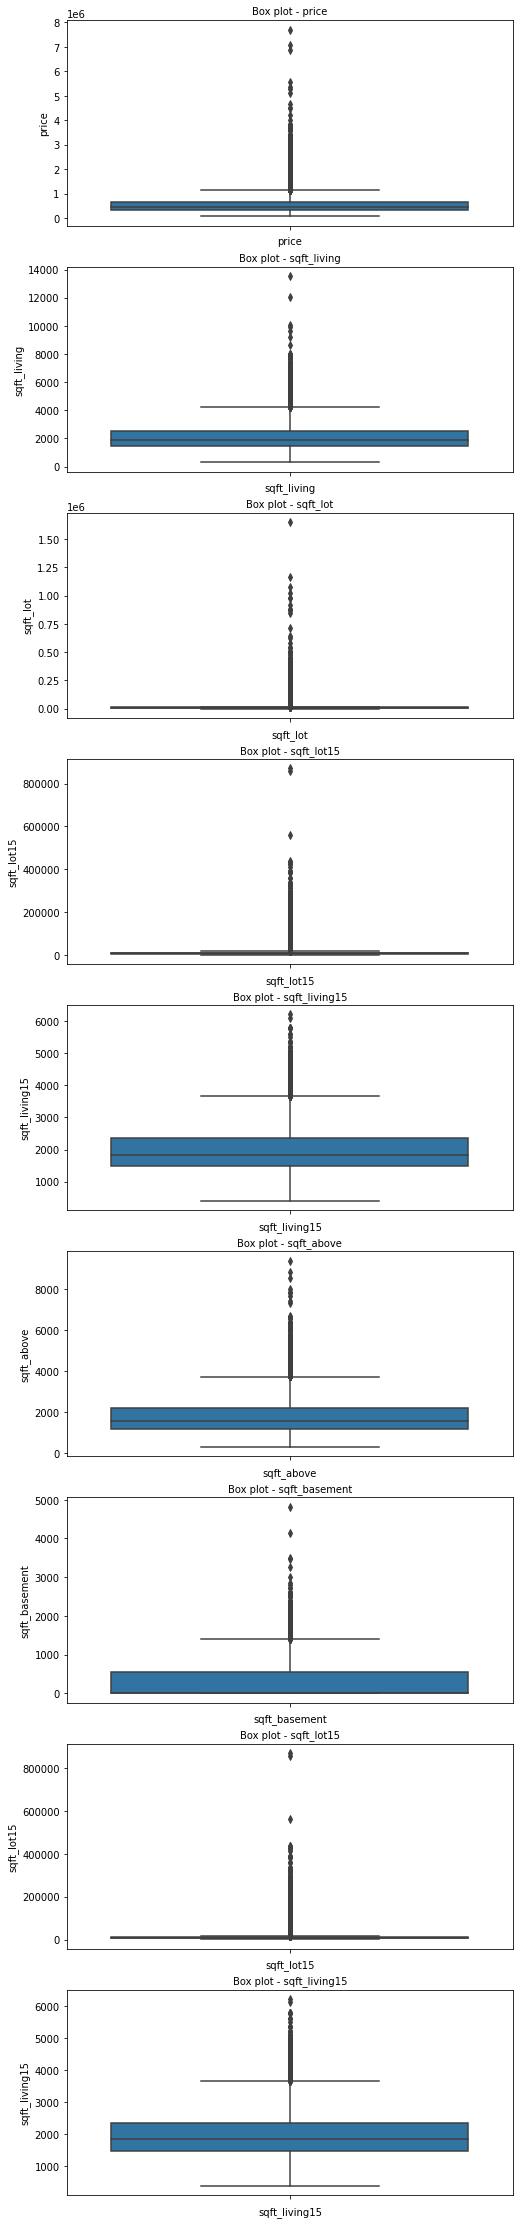

In [13]:
#boxplot to find outliers
#Plotting the box plot for columns with outliers

col_names = ['price','sqft_living','sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=dataset[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

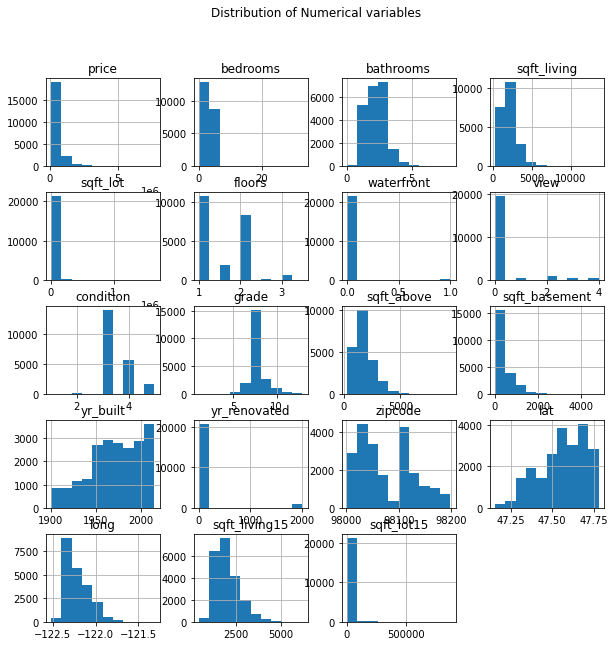

In [14]:

##Checking for data distribution
dataset.hist(bins=10, figsize=(10,10))
plt.suptitle('Distribution of Numerical variables')
plt.show()

In [15]:
correlation = dataset.corr()


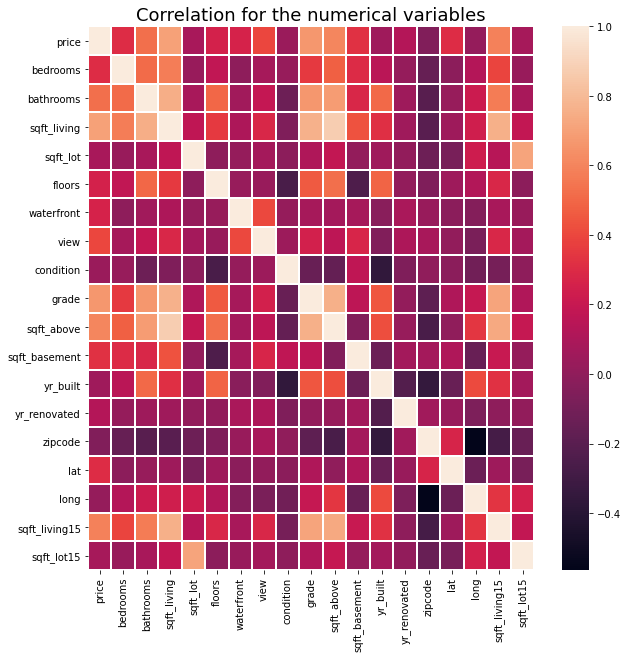

In [16]:
#correlation heatmap
plt.figure(figsize=(10,10))
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

#MULTIPLE LINEAR REGRESSION

In [17]:
#Focusing mainly on the independent variables
Independent_corr = dataset.iloc[:,2:].corr()

#Get the VIF scores
pd.DataFrame(np.linalg.inv(Independent_corr.values), index = Independent_corr.index, columns=Independent_corr.columns)

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bathrooms,3.222378,-3.316586e+00,-0.010257,-0.661487,0.027714,-0.010428,-0.151407,-0.182202,1.467846e+00,3.844861e-01,-0.898178,-0.247645,0.064180,-0.026881,0.058644,0.099082,0.095299
sqft_living,-3.315777,1.810638e+13,-0.065156,2.739302,-0.052470,0.033268,-0.193180,-1.828696,-1.632508e+13,-8.724901e+12,0.514133,0.173406,-0.323355,-0.035904,0.230768,-1.062486,-0.019342
sqft_lot,-0.010257,-6.503802e-02,2.101054,0.043693,0.025486,-0.062526,0.032034,-0.063029,-1.145648e-01,3.218788e-03,0.094718,0.019927,-0.004973,0.051821,-0.133730,0.163178,-1.461858
floors,-0.661487,2.738220e+00,0.043693,2.010470,-0.007427,-0.043519,0.091359,-0.240088,-2.946162e+00,-6.895383e-01,-0.485383,-0.081368,-0.173235,-0.129055,0.163751,0.271870,0.070080
waterfront,0.027714,-5.209225e-02,0.025486,-0.007427,1.201561,-0.497224,-0.010887,0.037553,-3.157182e-02,3.995405e-02,-0.026238,-0.067600,0.019501,0.007874,0.026571,0.053431,-0.021741
view,-0.010428,3.264861e-02,-0.062526,-0.043519,-0.497224,1.427395,-0.017619,-0.206529,7.047453e-02,-2.386704e-01,0.142369,-0.042291,-0.146192,0.115112,0.070718,-0.327139,-0.013385
condition,-0.151407,-1.939568e-01,0.032034,0.091359,-0.010887,-0.017619,1.247948,-0.045101,2.035966e-01,-1.895403e-02,0.565632,0.208317,0.163736,0.065285,-0.006338,0.076683,-0.025625
grade,-0.182202,-1.822793e+00,-0.063029,-0.240088,0.037553,-0.206529,-0.045101,3.359957,1.962429e-01,4.821032e-01,-0.663897,-0.079981,0.068260,-0.340305,0.390454,-0.916297,0.055994
sqft_above,1.472069,-1.632508e+13,-0.114450,-2.947801,-0.031285,0.069963,0.202861,0.201710,1.471903e+13,7.866550e+12,0.127591,-0.133218,0.258373,0.240324,-0.540504,-0.564309,-0.113029
sqft_basement,0.383080,-8.724901e+12,0.003275,-0.690166,0.040111,-0.238893,-0.019267,0.484838,7.866550e+12,4.204258e+12,0.036936,-0.084193,0.098041,-0.048980,0.041696,0.048287,-0.025204


###residual plots and heteroscedasticity 

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dataset[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
             'grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-4007.4202122431566

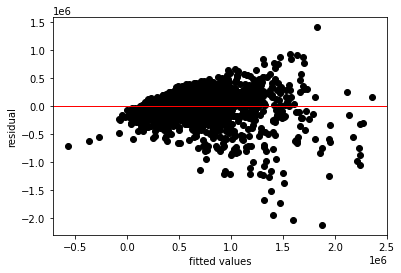

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [20]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


there is no heteroscadascticity.

the variances are homogenous

In [21]:
# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# The R2 score and RMSE for the linear model is 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_predict)
print("The R2 score for the linear model is:", linear_R2)

Root Mean Squared Error: 210453.9864782802
The R2 score for the linear model is: 0.662982673657134


Multiple Linear Regression model has an RMSE of 210453.9864782801 and the accuracy output at 0.662982673657134 

#QUANTILE REGRESSION

In [22]:

# Calling the training and test sets

X = dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = dataset['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [23]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', dataset)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3855
Model:                       QuantReg   Bandwidth:                   2.410e+04
Method:                 Least Squares   Sparsity:                    3.375e+05
Date:                Sat, 29 May 2021   No. Observations:                21610
Time:                        19:36:55   Df Residuals:                    21598
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.132e+06   1.01e+05     50.650      0.000    4.93e+06    5.33e+06
X[0]       -2.955e+04   1571.686    -18.804      0.000   -3.26e+04   -2.65e+04
X[1]          2.6e+04   2702.458      9.622      0.000    2.07e+04    3.13e+04
X[2]          87.7883      3.043     28.852      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [24]:
# This is our prediction for price based on our model
y_predict = res.predict()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
quantile_R2 = b = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", quantile_R2)

Root Mean Squared Error: 238378.19047341653
The R2 score for the elastic model is: 0.5789785891927457


The Quantile Regression model has average accuracy of 0.5789785891927457 and a low RMSE of 238378.19047341653

#RIDGE REGRESSION

In [25]:
# importing necessary libraries
from pydataset import data 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Setting up our X and y datasets
#
X = dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = dataset['price'].values

# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

51294759398.65656


In [26]:
# creating ridge model
#setting up the grid to be used

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [27]:
# We now use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

51901723393.93428

In [28]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

#there isn't much difference between model 1 and model 2

51307452083.274


In [29]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 224491.33482331375
The R2 score for the ridge model is: 0.6321983648653903


The Ridge Regression model has an accuracy of 63% and an equally high RMSE of  225852.05000334975

#LASSO REGRESSION

In [30]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = dataset['price'].values

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [31]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6199470201847976
lasso MSE: 51294759417.727005
lasso coef: [ -45931.30796891   38579.57224575  153001.41914757     442.67660243
   18116.30628919   12372.12499395  146615.36055383   12706.47413173
 -116666.740006     24873.7416591   -13820.7831956 ]


In [32]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6249028048855891
linear score: 0.6249001726136023
lasso MSE: 51010221374.82693
linear MSE: 51010579342.78435
lasso best estimator coef: [ -46659.04754795   35328.58447132  154577.33087573    1301.61068772
   19787.35679074   11232.06202454  147543.35793062   16135.53304491
 -115472.51474423   22582.81198029  -13805.8636645 ]
linear coef: [ -46720.05302054   35359.32807513  154573.91011023    1384.40474174
   19832.59327491   11255.28173607  147548.01810816   16164.217894
 -115522.90446014   22616.68709079  -13892.65819165]


In [46]:
import math
MSE = mean_squared_error(y_test, gridlasso.predict(X_test))

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

225854.42518318503


In [47]:
d = r2_score(y_test,y_pred)

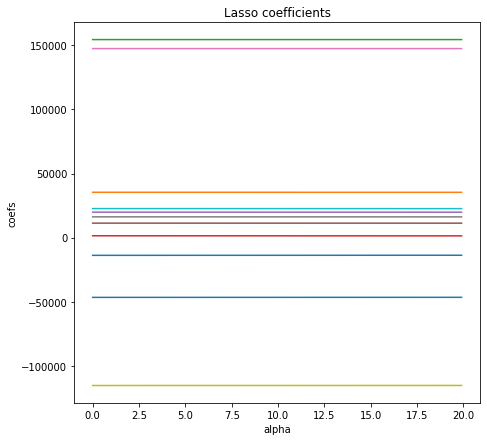

In [34]:
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Lasso Regression has a 0.6249028048855891 score and a RMSE of 225854.42518318503 

#ELASTIC NET REGRESSION

In [35]:
from sklearn.linear_model import ElasticNet

# data normalization
#creating grid
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [36]:
# Fitting the model to display best parameters abd best results for this setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

51977410743.561714

In [39]:
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [40]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", e)

The RMSE for the Elastic model: 226018.4040072095
The R2 score for the elastic model is: 0.6243579377618949


#CONCLUSION

Multiple Linear Regression model has an RMSE of 210453.9864782801 and the accuracy output at 0.662982673657134 

The Quantile Regression model has average accuracy of 0.5789785891927457 and a low RMSE of 238378.19047341653

The Ridge Regression model has an accuracy of 63% and low RMSE of  225852.05000334975

Lasso Regression has a 0.6249028048855891 score and a RMSE of 225854.42518318503 

In [48]:
# Reviewing the Solution 
# Models vs r2 score.
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)
print("**************")
print("The mean r2 scores is:", model_results.mean())
#model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

  Regresion models  r2_scores
0     multi-linear   0.662983
1         quantile   0.578979
2            ridge   0.632198
3            lasso   0.624358
4          elastic   0.624358
**************
The mean r2 scores is: r2_scores    0.624575
dtype: float64


The average accuracy for our 5 models is 0.624575. It is relatively fair, although not very reliant. 

This means that the Multi-linear Regression model with the highest accuracy of 0.662983 while also exhibiting the lowest RMSE is our best model for this project.

###Follow up questions
From the above workings, it is clear that
1. The dataset provided had the correct data for this project

2. It is not necessary to have additional information for this project as what is provided is perfectly sufficient

3. We did have the right question for the dataset provided